In [ ]:
# study_nlp.ipynb

In [1]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git

Cloning into 'pubmed-rct'...
Updating files:  53% (7/13)
Updating files:  61% (8/13)
Updating files:  69% (9/13)
Updating files:  76% (10/13)
Updating files:  84% (11/13)
Updating files:  92% (12/13)
Updating files: 100% (13/13)
Updating files: 100% (13/13), done.


In [2]:
# dev.txt : validation 데이터
# test.txt : 테스트 데이터
# train.txt : 학습 데이터 

In [3]:
data_dir = "pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign"

In [5]:
import os
filenames = [data_dir + "/" + filename for filename in os.listdir(data_dir)]
filenames

['pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt']

In [6]:
# 여기까지 해서 데이터가 준비!
# 데이터가 준비되면 데이터 살펴보기를 우선 실시!

In [8]:
def get_lines(filename):
    with open(filename, "r") as f:
        return f.readlines()

In [9]:
train_lines = get_lines(data_dir + "/" + "train.txt")

In [10]:
type(train_lines), len(train_lines)

(list, 210040)

In [11]:
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [24]:
def preprocess_text_with_line_numbers(filename):
  input_lines = get_lines(filename)
  abstract_lines = ""
  abstract_samples = []

  for line in input_lines:
    if line.startswith("###"): 
      abstract_id = line
      abstract_lines = ""
    elif line.isspace(): 
      abstract_line_split = abstract_lines.splitlines()

      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data = {} 
        target_text_split = abstract_line.split("\t") 
        line_data["target"] = target_text_split[0] 
        line_data["text"] = target_text_split[1].lower() 
        line_data["line_number"] = abstract_line_number 
        line_data["total_lines"] = len(abstract_line_split) - 1 
        abstract_samples.append(line_data) 
    else:
      abstract_lines += line
  
  return abstract_samples    

In [25]:
preprocess_text_with_line_numbers(data_dir + "/" + "sample.txt")

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

In [26]:
%%time
train_samples = preprocess_text_with_line_numbers(data_dir + "/" + "train.txt")
val_samples = preprocess_text_with_line_numbers(data_dir + "/" + "dev.txt")
test_samples = preprocess_text_with_line_numbers(data_dir + "/" + "test.txt")

Wall time: 1.31 s


In [27]:
len(train_samples), len(val_samples), len(test_samples)

(180040, 30212, 30135)

In [28]:
type(train_samples), type(val_samples), type(test_samples)

(list, list, list)

In [31]:
train_samples[0], type(train_samples[0])

({'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 dict)

In [32]:
import pandas as pd
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)

In [35]:
train_df.head(24)

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",5,11
6,RESULTS,there was a clinically relevant reduction in t...,6,11
7,RESULTS,the mean difference between treatment arms ( @...,7,11
8,RESULTS,"further , there was a clinically relevant redu...",8,11
9,RESULTS,these differences remained significant at @ we...,9,11


In [36]:
train_df.target.value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

In [37]:
train_df.total_lines.value_counts()

11    24468
10    23639
12    22113
9     19400
13    18438
14    14610
8     12285
15    10768
7      7464
16     7429
17     5202
6      3353
18     3344
19     2480
20     1281
5      1146
21      770
22      759
23      264
4       215
24      200
25      182
26       81
28       58
3        32
30       31
27       28
Name: total_lines, dtype: int64

<AxesSubplot:ylabel='Frequency'>

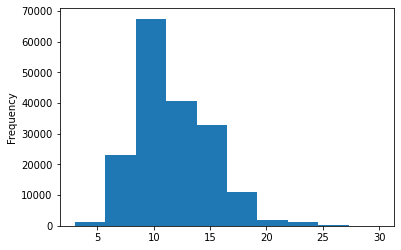

In [39]:
train_df.total_lines.plot.hist()

In [41]:
train_df["text"], type(train_df["text"])

(0         to investigate the efficacy of @ weeks of dail...
 1         a total of @ patients with primary knee oa wer...
 2         outcome measures included pain reduction and i...
 3         pain was assessed using the visual analog pain...
 4         secondary outcome measures included the wester...
                                 ...                        
 180035    for the absolute change in percent atheroma vo...
 180036    for pav , a significantly greater percentage o...
 180037    both strategies had acceptable side effect pro...
 180038    compared with standard statin monotherapy , th...
 180039    ( plaque regression with cholesterol absorptio...
 Name: text, Length: 180040, dtype: object,
 pandas.core.series.Series)

In [43]:
train_sentences = train_df["text"].tolist()
val_sentences = val_df["text"].tolist()
test_sentences = test_df["text"].tolist()
len(train_sentences), len(val_sentences), len(test_sentences)

(180040, 30212, 30135)

In [44]:
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

In [ ]:
# METHODS => 0, RESULTS => 1 ... 라벨을 할 수도 있다
# Tensorflow의 CategoricalCrossentropy loss 함수의 경우 one hot encoding한 라벨을 선호

In [46]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(
    train_df["target"].to_numpy().reshape(-1, 1)
)
val_labels_one_hot = one_hot_encoder.fit_transform(
    val_df["target"].to_numpy().reshape(-1, 1)
)
test_labels_one_hot = one_hot_encoder.fit_transform(
    test_df["target"].to_numpy().reshape(-1, 1)
)


In [48]:
type(train_labels_one_hot), train_labels_one_hot, train_labels_one_hot.shape

(numpy.ndarray,
 array([[0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        ...,
        [0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.]]),
 (180040, 5))

In [49]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(
    train_df["target"].to_numpy().reshape(-1, 1)
)
val_labels_encoded = label_encoder.fit_transform(
    val_df["target"].to_numpy().reshape(-1, 1)
)
test_labels_encoded = label_encoder.fit_transform(
    test_df["target"].to_numpy().reshape(-1, 1)
)

c:\20210918\venv_20210918\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [51]:
train_labels_encoded, type(train_labels_encoded), train_labels_encoded.shape

(array([3, 2, 2, ..., 4, 1, 1]), numpy.ndarray, (180040,))

In [54]:
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes, class_names

(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

In [55]:
# Model 0 : 가장 기본이 되는 간단한 모델

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ("tf-idf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])

model_0.fit(
    X = train_sentences, 
    y = train_labels_encoded    
)

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [56]:
model_0.score(
    X = val_sentences,
    y = val_labels_encoded
)

0.7218323844829869

In [57]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

In [59]:
from helper_functions import calculate_results

In [60]:
baseline_results = calculate_results(
    y_true = val_labels_encoded,
    y_pred = baseline_preds 
)
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

In [61]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [65]:
train_sentences[0]

'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .'

In [68]:
train_sentences[0].split()

['to',
 'investigate',
 'the',
 'efficacy',
 'of',
 '@',
 'weeks',
 'of',
 'daily',
 'low-dose',
 'oral',
 'prednisolone',
 'in',
 'improving',
 'pain',
 ',',
 'mobility',
 ',',
 'and',
 'systemic',
 'low-grade',
 'inflammation',
 'in',
 'the',
 'short',
 'term',
 'and',
 'whether',
 'the',
 'effect',
 'would',
 'be',
 'sustained',
 'at',
 '@',
 'weeks',
 'in',
 'older',
 'adults',
 'with',
 'moderate',
 'to',
 'severe',
 'knee',
 'osteoarthritis',
 '(',
 'oa',
 ')',
 '.']

In [67]:
sent_lens = [len(sentence.split()) for sentence in train_sentences]
avg_sent_len = np.mean(sent_lens)
avg_sent_len

26.338269273494777

(array([1.25846e+05, 4.78220e+04, 5.37600e+03, 7.86000e+02, 1.46000e+02,
        3.20000e+01, 1.90000e+01, 8.00000e+00, 3.00000e+00, 2.00000e+00]),
 array([  1. ,  30.5,  60. ,  89.5, 119. , 148.5, 178. , 207.5, 237. ,
        266.5, 296. ]),
 <BarContainer object of 10 artists>)

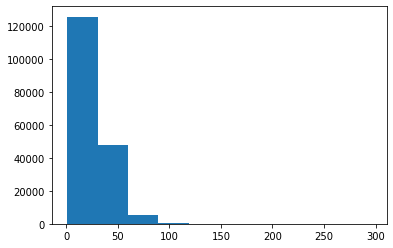

In [69]:
import matplotlib.pyplot as plt

plt.hist(sent_lens)

In [70]:
output_seq_len = int(np.percentile(sent_lens, 95))
output_seq_len

55

In [71]:
max(sent_lens)

296

In [72]:
max_tokens = 68000

In [73]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer = TextVectorization(
    max_tokens = max_tokens,
    output_sequence_length = output_seq_len
)

In [75]:
train_sentences

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

In [74]:
text_vectorizer.adapt(train_sentences)

In [82]:
import random

target_sentence = random.choice(train_sentences)
print(f"Text: \n{target_sentence}")
print(f"\nText를 만드는 token의 갯수: \n{len(target_sentence.split())}")
print(f"\nVector로 만들어진 Text: \n{text_vectorizer([target_sentence])} {text_vectorizer([target_sentence]).shape}")

Text: 
these findings highlight the potentially harmful physiological consequences of exposure to weight stigma .

Text를 만드는 token의 갯수: 
14

Vector로 만들어진 Text: 
[[ 111  310 4779    2 1190 4589 1658 1978    4  455    6  174 4684    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]] (1, 55)


In [85]:
rct_20k_text_vocab = text_vectorizer.get_vocabulary()
print(len(rct_20k_text_vocab))
print(rct_20k_text_vocab[:5])
print(rct_20k_text_vocab[-5:])

64841
['', '[UNK]', 'the', 'and', 'of']
['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [86]:
text_vectorizer.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'batch_input_shape': (None,),
 'dtype': 'string',
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False}